### Problem Defination

Based on the introduction the key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to "churn / not churn". A side question will be, which features actually drive customer churn. That information can be used to identify customer "pain points" and resolve them by providing goodies to make customers stay.

In [76]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings 



### Exploratory Data Analysis

- Load the train data and try to explore the different statistical properties of the dataset.

In [27]:
# Code starts here

train_data=pd.read_csv('train.csv')

In [28]:
train_data.head()

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1370,7596-IIWYC,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,5676,9103-CXVOK,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,1645,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,366,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No


In [29]:
train_data.isnull().sum()

Id                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [31]:
train_data[train_data['TotalCharges']==' ']

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
827,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
951,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2053,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3189,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4174,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
4583,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5130,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
5355,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
5393,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


In [32]:
train_data.describe()

,Id,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,3520.088569,0.161519,32.075790,64.671166
std,2028.634870,0.368042,24.492631,30.177218
min,0.000000,0.000000,0.000000,18.250000
25%,1767.250000,0.000000,9.000000,35.275000
50%,3512.000000,0.000000,28.000000,70.350000
75%,5282.750000,0.000000,55.000000,90.050000
max,7042.000000,1.000000,72.000000,118.750000


In [33]:
train_data['TotalCharges']=pd.to_numeric(train_data['TotalCharges'],errors='coerce')

In [34]:
train_data.isnull().sum()

Id                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [35]:
train_data.dropna(inplace=True)

In [36]:
train_data.drop(columns='Id',inplace=True)

### Visualize the data

- Replace the missing values and modify some column values(as required by you).
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [37]:
# Code starts here
train_data.Churn.value_counts()*100/train_data.shape[0]



No     73.084444
Yes    26.915556
Name: Churn, dtype: float64

In [38]:
for i in train_data.columns:
    print(f" {i}'s count : {train_data[i].nunique()}")

 customerID's count : 5625
 gender's count : 2
 SeniorCitizen's count : 2
 Partner's count : 2
 Dependents's count : 2
 tenure's count : 72
 PhoneService's count : 2
 MultipleLines's count : 3
 InternetService's count : 3
 OnlineSecurity's count : 3
 OnlineBackup's count : 3
 DeviceProtection's count : 3
 TechSupport's count : 3
 StreamingTV's count : 3
 StreamingMovies's count : 3
 Contract's count : 3
 PaperlessBilling's count : 2
 PaymentMethod's count : 4
 MonthlyCharges's count : 1482
 TotalCharges's count : 5274
 Churn's count : 2


In [39]:
plt.style.use('fivethirtyeight')

C:\Users\Wasim\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


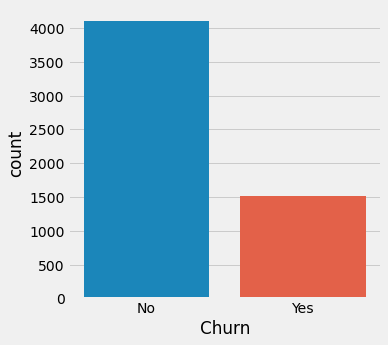

In [40]:
plt.figure(figsize=(5,5))
ax=sns.countplot(train_data['Churn'])
plt.show()

In [41]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()
    

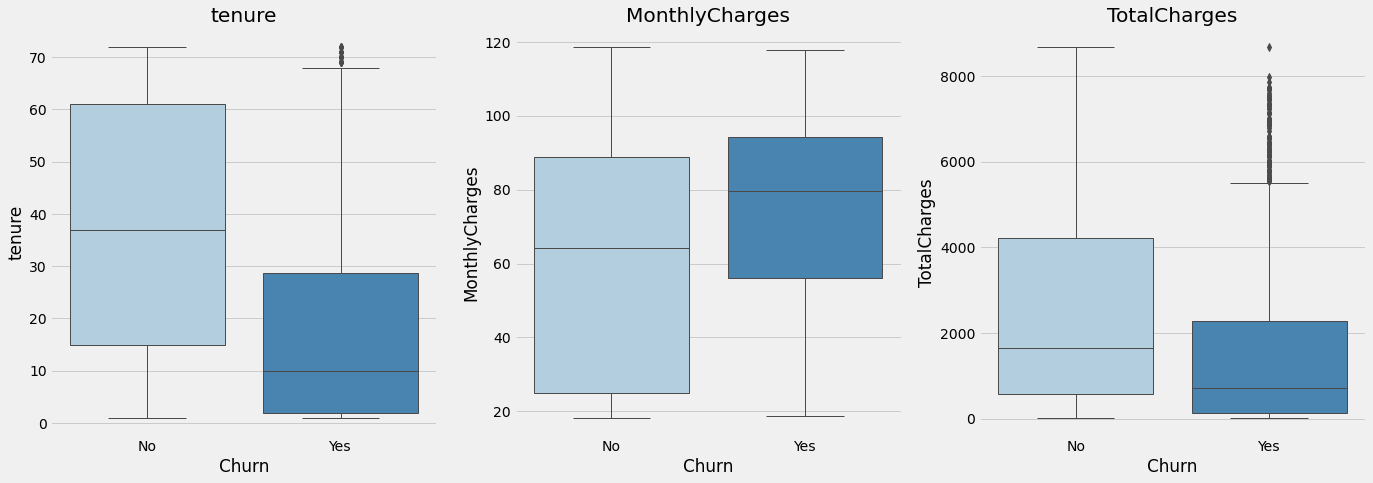

In [42]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], train_data)

Plot insights:

1.Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.<br>
2.Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD)

In [43]:
train_data.drop(columns='customerID',inplace=True)

In [44]:
train_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
ordinal_cols=['Partner', 'Dependents','PhoneService','Churn']

In [46]:
nominal_cols=[col for col in train_data.columns if train_data[col].dtype=='O' and col not in ordinal_cols]

In [47]:
nominal_cols

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [48]:

# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

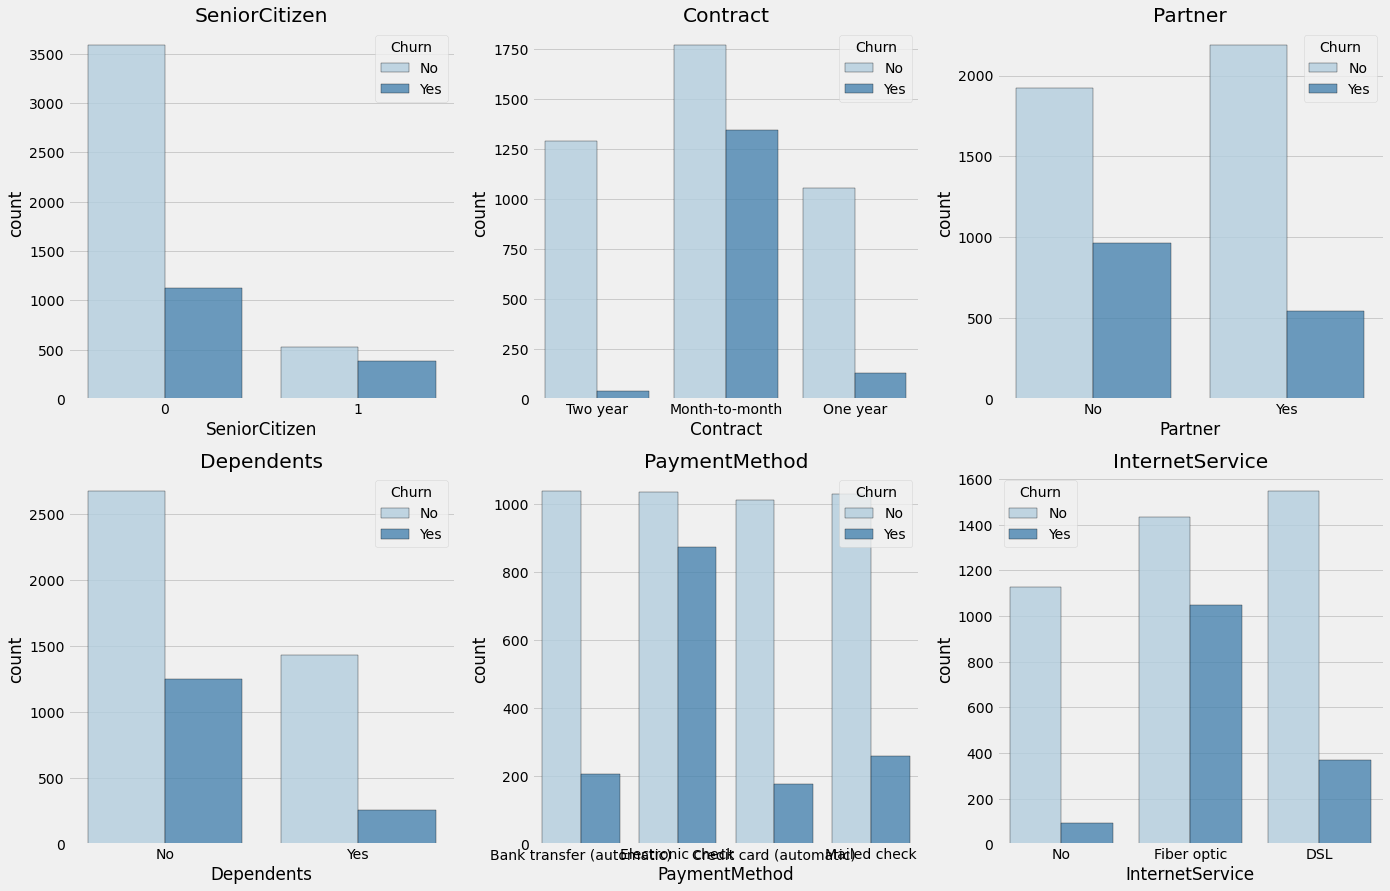

In [49]:
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], train_data)

In [50]:
for i in ordinal_cols:
    train_data[i]=train_data[i].map({'Yes':1,'No':0})

In [51]:
train_data=pd.get_dummies(train_data,columns=nominal_cols)

In [52]:
from sklearn.preprocessing import MinMaxScaler

num_cols=['MonthlyCharges', 'TotalCharges','tenure']

In [53]:
numeric_df=train_data[num_cols]

In [54]:
rest_df=train_data.drop(columns=num_cols)

In [55]:
rest_df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,1,1,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,1,0,0,1,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,1,0,0,0


In [56]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(numeric_df)

In [57]:
scaled_df=pd.DataFrame(scaled_data,columns=numeric_df.columns,index=numeric_df.index)

In [58]:
df_final=pd.concat([scaled_df,rest_df],axis=1)

In [59]:
df_final.head()

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen,Partner,Dependents,PhoneService,Churn,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.019900,0.059935,0.366197,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
1,0.014925,0.000110,0.000000,0,1,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0.614925,0.153110,0.225352,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,0.660697,0.406479,0.577465,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.414925,0.160074,0.309859,0,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,0


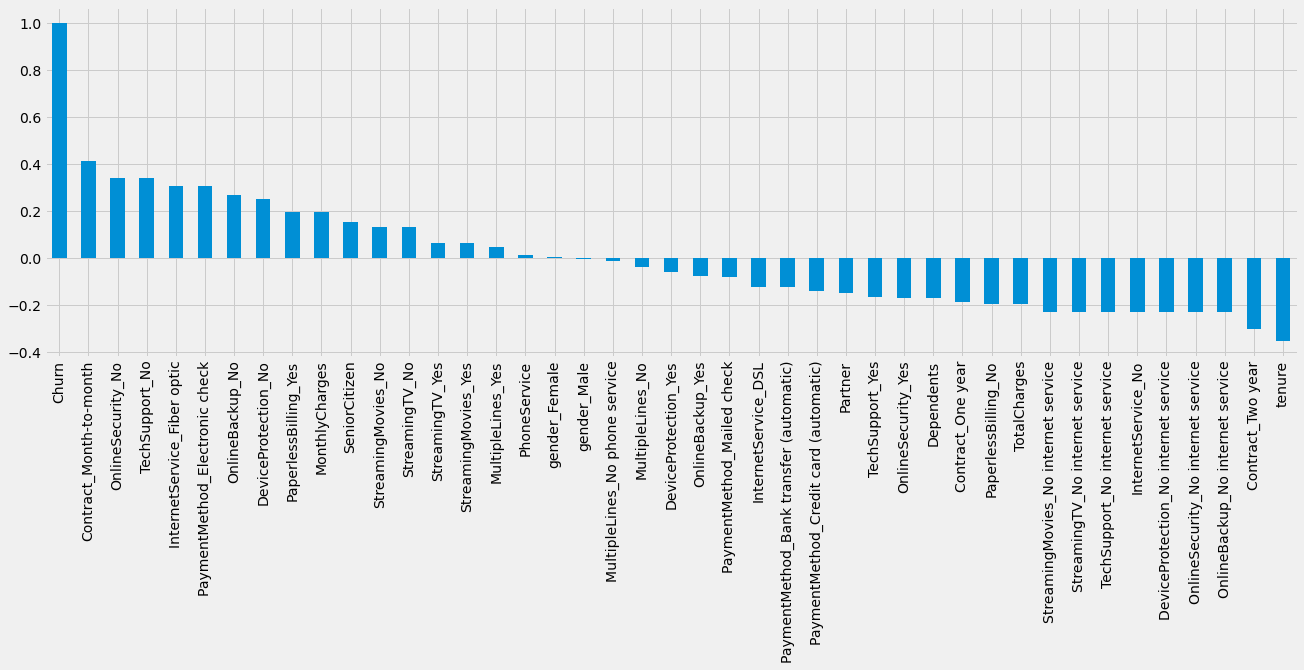

In [62]:
df_final.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.savefig('corr_mat.png', bbox_inches='tight')

In [63]:
X=df_final.drop(columns='Churn')

In [64]:
y=df_final.Churn

In [65]:
type(y)

pandas.core.series.Series

In [66]:
type(y.values)

numpy.ndarray

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

### Model Evaluation Metrics

 - Confusion matrix: Shows a grid of true and false predictions compared to the actual values
 - Accuracy score: Shows the overall accuracy of the model for training set and test set
 - ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate(FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
 - AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve
 - Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
 - F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

 ### Model Selection, Training, Prediction and Assessment

In [70]:
# Code Starts here
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



0.7635555555555555
[[709 123]
 [143 150]]


In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8035555555555556
[[743  89]
 [132 161]]


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7875555555555556
[[741  91]
 [148 145]]


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7946666666666666
[[739  93]
 [138 155]]


 ### Hyperparameter Tuning/Model Improvement

In [77]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 270, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


In [78]:
print(accuracy_score(y_test,y_pred_rf_tuned))
print(confusion_matrix(y_test,y_pred_rf_tuned))

0.8
[[741  91]
 [134 159]]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [153]:
# Code Starts here

test_data=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')



In [154]:
test_data.shape

(1409, 21)

In [155]:
test_data.drop(columns=['Id','customerID'],inplace=True)

In [163]:
test_data.fillna(method='ffill',inplace=True)

In [164]:
test_data.shape

(1409, 42)

In [158]:
test_ordinal_cols=['Partner', 'Dependents','PhoneService']

In [159]:
for i in test_ordinal_cols:
    test_data[i]=test_data[i].map({'Yes':1,'No':0})

In [160]:
test_data=pd.get_dummies(test_data,columns=nominal_cols)

In [161]:
test_data['TotalCharges']=pd.to_numeric(test_data['TotalCharges'],errors='coerce')

In [165]:
test_num_df=test_data[num_cols]

In [166]:
rest_test_df=test_data.drop(columns=num_cols)

In [167]:
test_num_df

,MonthlyCharges,TotalCharges,tenure
0,79.70,5293.40,67
1,38.55,280.00,7
2,98.45,6145.20,61
3,78.80,3460.30,43
4,88.60,2888.70,33
...,...,...,...
1404,55.50,3166.90,58
1405,118.65,8477.60,71
1406,79.20,4590.35,59
1407,19.70,1253.80,66


In [168]:
scaled_test_data=scaler.transform(test_num_df)

In [169]:
scaled_df_test=pd.DataFrame(scaled_test_data,columns=test_num_df.columns,index=test_num_df.index)

In [170]:
final_test_df=pd.concat([scaled_df_test,rest_test_df],axis=1)

In [171]:

final_test_df.shape

(1409, 42)

In [172]:
for cols in final_test_df.columns:
    print(final_test_df[cols].max())

0.9990049751243782
0.9820793907223633
1.0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [173]:
X_pred_test=ada.predict(final_test_df)

In [174]:
submission.head()

,Id,Churn
0,4539,Yes
1,1802,No
2,1380,No
3,5305,No
4,1960,No


In [138]:
X_pred_test.map({1:'Yes',0:'No'})

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [175]:
submission['Churn']=X_pred_test

In [176]:
submission['Churn'].map({1:'Yes',0:'No'})

0       No
1       No
2       No
3       No
4       No
        ..
1404    No
1405    No
1406    No
1407    No
1408    No
Name: Churn, Length: 1409, dtype: object

In [177]:
submission.to_csv('final_sub.csv',index=False)